In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
import csv

data = {
    "Temp": [50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100],
    "Yield": [3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0]
}


df = pd.DataFrame(data)


filename = 'tempyield.csv'

df.to_csv(filename, index=False)

Simple Linear Regression: y = 0.01x + 2.31
Polynomial Regression: y = 0.0011x^2 + -0.15x + 7.96


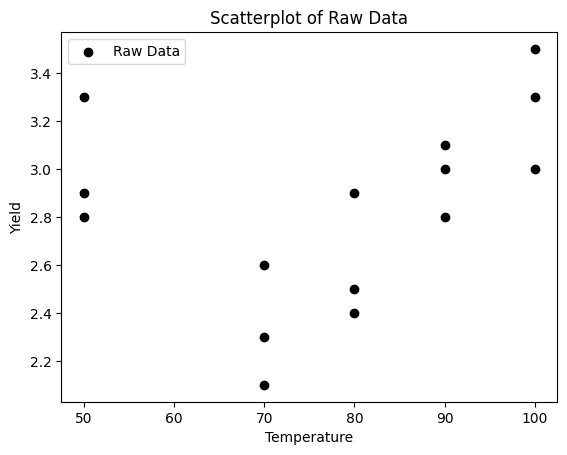

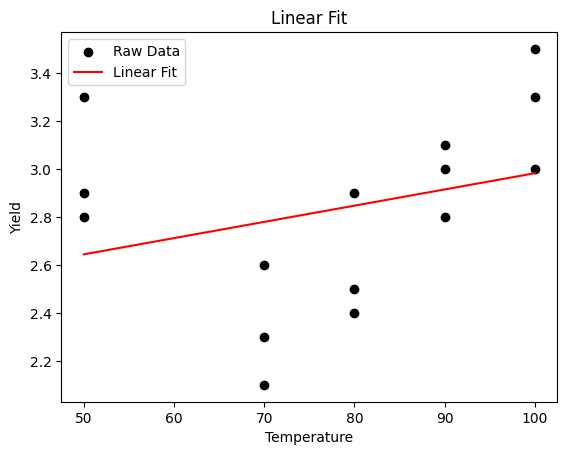

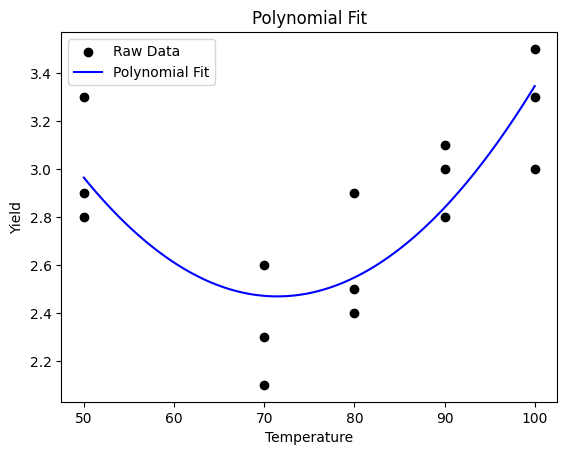

MSE (Linear): 0.1327
RMSE (Linear): 0.3643
MSE (Polynomial): 0.0478
RMSE (Polynomial): 0.2186


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

df = pd.read_csv('yield_data.csv')

def simple_linear_regression(x, y):
    # usign pedhazur method
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x * y)
    x_squared_mean = np.mean(x ** 2)
    m = (x_mean * y_mean - xy_mean) / (x_mean ** 2 - x_squared_mean)
    b = y_mean - m * x_mean
    return m, b

def polynomial_regression(x, y, degree):
    coefficients = np.polyfit(x, y, degree)
    return coefficients

def plot_scatterplot(x, y, title, xlabel, ylabel):
    plt.scatter(x, y, color='black', label='Raw Data')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

def plot_linear_fit(x, y, m, b, title, xlabel, ylabel):
    plt.scatter(x, y, color='black', label='Raw Data')
    plt.plot(x, m * x + b, color='red', label='Linear Fit')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

def plot_polynomial_fit(x, y, coefficients, title, xlabel, ylabel):
    plt.scatter(x, y, color='black', label='Raw Data')
    x_values = np.linspace(min(x), max(x), 100)
    y_values = np.polyval(coefficients, x_values)
    plt.plot(x_values, y_values, color='blue', label='Polynomial Fit')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Extract data
x = df['Temp'].values
y = df['Yield'].values

# Simple Linear Regression
m, b = simple_linear_regression(x, y)
print(f'Simple Linear Regression: y = {m:.2f}x + {b:.2f}')

# Polynomial Regression (degree 2)
coefficients = polynomial_regression(x, y, 2)
print(f'Polynomial Regression: y = {coefficients[0]:.4f}x^2 + {coefficients[1]:.2f}x + {coefficients[2]:.2f}')

# Plotting
plot_scatterplot(x, y, 'Scatterplot of Raw Data', 'Temperature', 'Yield')
plot_linear_fit(x, y, m, b, 'Linear Fit', 'Temperature', 'Yield')
plot_polynomial_fit(x, y, coefficients, 'Polynomial Fit', 'Temperature', 'Yield')

# Predictions
y_pred_linear = m * x + b
y_pred_polynomial = np.polyval(coefficients, x)

# Compute errors and metrics
mse_linear = mean_squared_error(y, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mse_polynomial = mean_squared_error(y, y_pred_polynomial)
rmse_polynomial = np.sqrt(mse_polynomial)

print(f'MSE (Linear): {mse_linear:.4f}')
print(f'RMSE (Linear): {rmse_linear:.4f}')
print(f'MSE (Polynomial): {mse_polynomial:.4f}')
print(f'RMSE (Polynomial): {rmse_polynomial:.4f}')


Matrix Method Coefficients: b0 = -0.4651574447370521, b1 = 0.545326513638808, b2 = 0.16186790187114805
Intuitive Method Coefficients: b0 = -0.4651574447370574, b1 = 0.545326513638812, b2 = 0.16186790187114797
MSE (Matrix Method): 0.01934443236798666
RMSE (Matrix Method): 0.13908426355266315
MAE (Matrix Method): 0.09786643457557438
MSE (Intuitive Method): 0.019344432367986657
RMSE (Intuitive Method): 0.13908426355266312
MAE (Intuitive Method): 0.09786643457557435


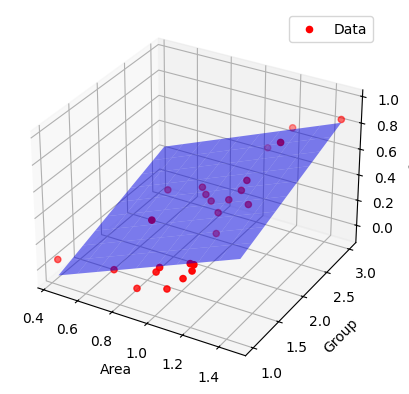

In [7]:
'''a. Create a CSV file with sample data.
b. Write a Python function program to:
c. Find the fitted multiple linear regression equation for the given data.
d. Compare the coefficients obtained manually using intuitive and matrix formulation methods with
your program.
e. Plot the data adorned with the estimated regression equation.
f. Compute the error, MSE, and RMSE.'''


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv

# Load data
df = pd.read_csv('heart_attack_rabbits.csv')
X = df[['Area', 'Group']].values
y = df['Infarc'].values

# it is necessary to add intercept term (column of ones)
X_ = np.c_[np.ones(X.shape[0]), X]  # shape: (n_samples, n_features + 1)

# using the Normal Equation (Matrix Method)
coefficients = inv(X_.T @ X_) @ X_.T @ y
b0, b1, b2 = coefficients

y_pred_matrix = X_ @ coefficients

# for intuitive approach (pedhazur method)
mean_X1 = np.mean(X[:, 0])
mean_X2 = np.mean(X[:, 1])
mean_y = np.mean(y)

cov_X1_y = np.mean((X[:, 0] - mean_X1) * (y - mean_y))
cov_X2_y = np.mean((X[:, 1] - mean_X2) * (y - mean_y))
var_X1 = np.mean((X[:, 0] - mean_X1) ** 2)
var_X2 = np.mean((X[:, 1] - mean_X2) ** 2)
cov_X1_X2 = np.mean((X[:, 0] - mean_X1) * (X[:, 1] - mean_X2))

b1_intuitive = (cov_X1_y * var_X2 - cov_X2_y * cov_X1_X2) / (var_X1 * var_X2 - cov_X1_X2 ** 2)
b2_intuitive = (cov_X2_y * var_X1 - cov_X1_y * cov_X1_X2) / (var_X1 * var_X2 - cov_X1_X2 ** 2)
b0_intuitive = mean_y - b1_intuitive * mean_X1 - b2_intuitive * mean_X2

y_pred_intuitive = b0_intuitive + b1_intuitive * X[:, 0] + b2_intuitive * X[:, 1]

print(f'Matrix Method Coefficients: b0 = {b0}, b1 = {b1}, b2 = {b2}')
print(f'Intuitive Method Coefficients: b0 = {b0_intuitive}, b1 = {b1_intuitive}, b2 = {b2_intuitive}')

mse_matrix = np.mean((y - y_pred_matrix) ** 2)
rmse_matrix = np.sqrt(mse_matrix)
mae_matrix = np.mean(np.abs(y - y_pred_matrix))

mse_intuitive = np.mean((y - y_pred_intuitive) ** 2)
rmse_intuitive = np.sqrt(mse_intuitive)
mae_intuitive = np.mean(np.abs(y - y_pred_intuitive))

print(f'MSE (Matrix Method): {mse_matrix}')
print(f'RMSE (Matrix Method): {rmse_matrix}')
print(f'MAE (Matrix Method): {mae_matrix}')

print(f'MSE (Intuitive Method): {mse_intuitive}')
print(f'RMSE (Intuitive Method): {rmse_intuitive}')
print(f'MAE (Intuitive Method): {mae_intuitive}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Area'], df['Group'], df['Infarc'], color='red', label='Data')

area_range = np.linspace(df['Area'].min(), df['Area'].max(), 10)
group_range = np.linspace(df['Group'].min(), df['Group'].max(), 10)
area_grid, group_grid = np.meshgrid(area_range, group_range)
infarc_grid_matrix = b0 + b1 * area_grid + b2 * group_grid

ax.plot_surface(area_grid, group_grid, infarc_grid_matrix, color='blue', alpha=0.5)

plt.xlabel('Area')
plt.ylabel('Group')
ax.set_zlabel('Infarc')
plt.legend()
plt.show()
